## salva excel

In [ ]:
import serial.tools.list_ports
import time
import csv
import serial
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Esse primeiro bloco lista as portas e pede para dizer qual porta usar
ports = serial.tools.list_ports.comports()
serialInst = serial.Serial()
portList = []

print("Portas em uso nesse dispositivo:\n")
for onePort in ports:
    portList.append(str(onePort))
    print(str(onePort))

val = 3  # Defina a porta COM a ser usada
trigger = 100
sinal = 0
 
for x in range(len(portList)):
    if portList[x].startswith("COM" + str(val)):
       portVar = "COM" + str(val)

print("Valor de trigger:", trigger)

f = open("data.csv", "w", newline='')
f.truncate() 

serialCom = serial.Serial(portVar, 230400)

time.sleep(1)

while sinal < trigger:
    s_bytes = serialCom.readline()
    decoded_bytes = s_bytes.decode("utf-8").strip('\r\n')
    values = [float(x) for x in decoded_bytes.split()]
    sinal = values[1]

kmax = 37500  # Número de pontos a serem lidos

for k in range(kmax):
    try:
        s_bytes = serialCom.readline()
        decoded_bytes = s_bytes.decode("utf-8").strip('\r\n')
        values = [float(x) for x in decoded_bytes.split()]
        writer = csv.writer(f, delimiter=",")
        writer.writerow(values)
    except:
        print("Error - line was not recorded")

f.close()
serialCom.close()
 
# Usando o data.csv para gerar um gráfico
data = pd.read_csv("data.csv")
D = data.to_numpy()

tms = D[:,0]
t0 = D[0,0]
t = tms/1000 - t0/1000
accel = D[:,1]

plt.rcParams["figure.figsize"] = (10, 4)
plt.plot(t, accel)
plt.ylabel("Sinal (Analogico)")
plt.xlabel("Time (s)")
plt.show()

# Salvando os dados em um arquivo Excel
df = pd.DataFrame({'Time (s)': t, 'Sinal (Analogico)': accel})
df.to_excel('sinal_data.xlsx', index=False)

print("Dados salvos no arquivo 'sinal_data.xlsx'")


## não salva excel

Portas em uso nesse dispositivo:

COM3 - USB-Enhanced-SERIAL CH343 (COM3)
Valor de trigger: 100


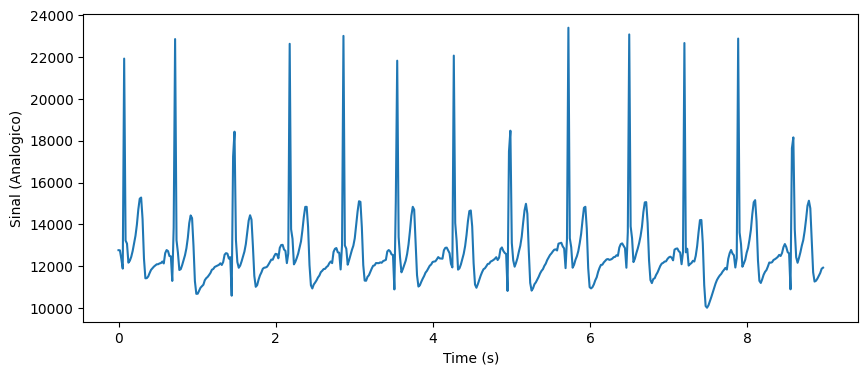

In [3]:
#Programa para ler os dados enviados continuamente

#pelo Arduino e fazer um grÃ¡fico quando a leitura

#ultrapassar um certo valor de trigger

import serial.tools.list_ports
import time
import csv
import serial
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Esse primeiro bloco lista as portas e pede para

#dizer qual porta usar

ports = serial.tools.list_ports.comports()

serialInst = serial.Serial()

portList = []

print("Portas em uso nesse dispositivo:")

print("")

for onePort in ports:

    portList.append(str(onePort))

    print(str(onePort))

val = 3 #input("Qual o numero de porta COM ?: ")

trigger = 100

sinal = 0
 
for x in range(0,len(portList)):

    if portList[x].startswith("COM" + str(val)):

       portVar = "COM" + str(val)

#       print(portList[x])

# path of this script

#directory = "C:\Testes\\"

# get fileName from user

#filepath = directory + "data.csv"

print("Valor de trigger:",trigger)

f = open("data.csv","w",newline='')

f.truncate() 

serialCom = serial.Serial(portVar,230400)

#reseting arduino

#serialCom.setDTR(False)

#time.sleep(1)

#serialCom.flushInput()

#serialCom.setDTR(True)

time.sleep(1)

while sinal<trigger:

    s_bytes=serialCom.readline()

    decoded_bytes = s_bytes.decode("utf-8").strip('\r\n')

    values = [float(x) for x in decoded_bytes.split()]

    sinal = values[1]

    #print(sinal) 

kmax = 500 # number of points to read

for k in range(kmax):
    try:
        s_bytes=serialCom.readline()
        decoded_bytes = s_bytes.decode("utf-8").strip('\r\n')
        #print(decoded_bytes)
        values = [float(x) for x in decoded_bytes.split()]
        writer = csv.writer(f,delimiter=",")
        writer.writerow(values)
    except:

        print("Error - line was not recorded")

f.close()

serialCom.close()
 
#Using the data.csv to generate a plot

data = pd.read_csv("data.csv")

D = data.to_numpy();

tms = D[:,0]

t0 = D[0,0]

t = tms/1000 - t0/1000

accel = D[:,1]

plt.rcParams["figure.figsize"] = (10, 4)

plt.plot(t,accel)

plt.ylabel("Sinal (Analogico)")

plt.xlabel("Time (s)")

plt.show()

Portas em uso nesse dispositivo:

COM3 - USB-Enhanced-SERIAL CH343 (COM3)
Valor de trigger: 100


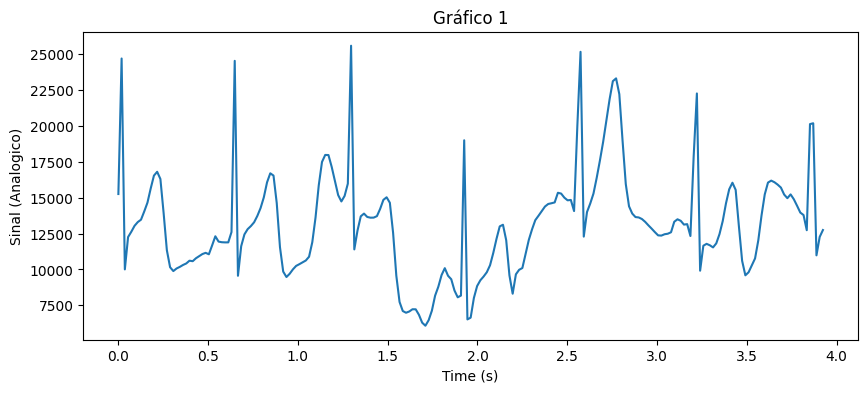

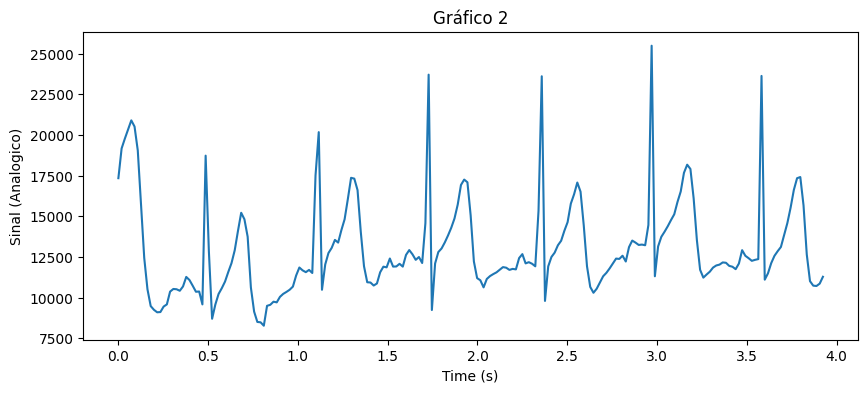

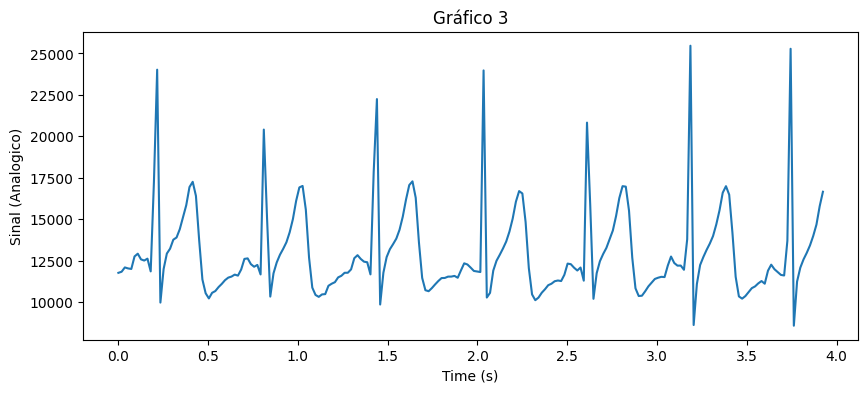

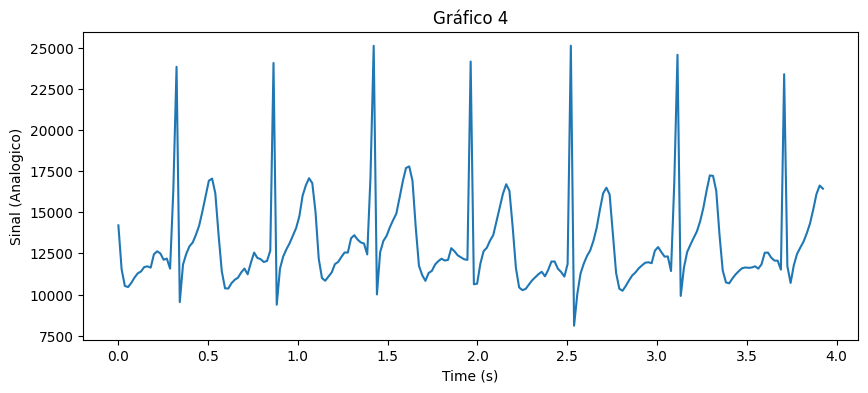

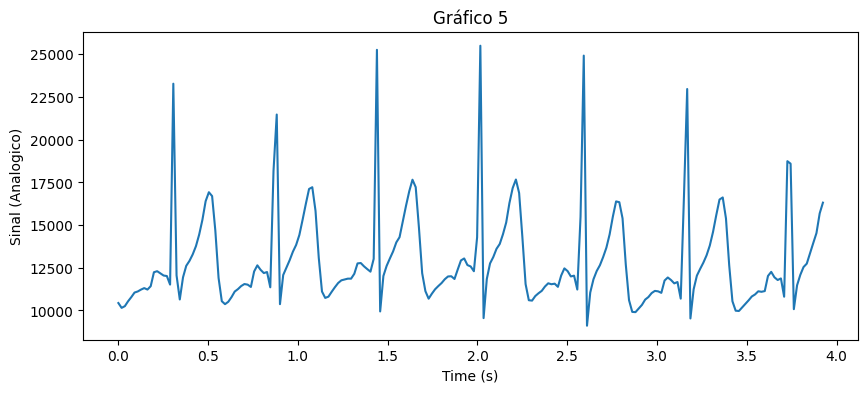

In [9]:
import serial.tools.list_ports
import time
import csv
import serial
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Listar portas e escolher a porta COM
ports = serial.tools.list_ports.comports()
serialInst = serial.Serial()
portList = []

print("Portas em uso nesse dispositivo:\n")
for onePort in ports:
    portList.append(str(onePort))
    print(str(onePort))

val = 3  # Número da porta COM a ser utilizada
trigger = 100
n_graficos = 5

# Abrir a porta serial
for x in range(0, len(portList)):
    if portList[x].startswith("COM" + str(val)):
        portVar = "COM" + str(val)

print("Valor de trigger:", trigger)

serialCom = serial.Serial(portVar, 230400)
time.sleep(1)

for i in range(n_graficos):
    sinal = 0
    while sinal < trigger:
        try:
            s_bytes = serialCom.readline()
            decoded_bytes = s_bytes.decode("utf-8").strip('\r\n')
            values = [float(x) for x in decoded_bytes.split()]
            if len(values) < 2:
                print(f"Dados incompletos recebidos: {values}")
                continue
            sinal = values[1]
        except Exception as e:
            print(f"Erro ao processar os dados: {e}")
            continue

    # Coletar dados por kmax pontos
    kmax = 220
    data = []
    for k in range(kmax):
        try:
            s_bytes = serialCom.readline()
            decoded_bytes = s_bytes.decode("utf-8").strip('\r\n')
            values = [float(x) for x in decoded_bytes.split()]
            if len(values) < 2:
                print(f"Dados incompletos recebidos: {values}")
                continue
            data.append(values)
        except Exception as e:
            print(f"Erro ao processar os dados: {e}")
            continue
    
    # Salvar dados em um arquivo CSV temporário
    temp_filename = f"data_{i}.csv"
    with open(temp_filename, "w", newline='') as f:
        writer = csv.writer(f, delimiter=",")
        writer.writerows(data)

    # Ler os dados e gerar o gráfico
    data = pd.read_csv(temp_filename)
    D = data.to_numpy()
    tms = D[:, 0]
    t0 = D[0, 0]
    t = tms / 1000 - t0 / 1000
    accel = D[:, 1]

    plt.rcParams["figure.figsize"] = (10, 4)
    plt.plot(t, accel)
    plt.ylabel("Sinal (Analogico)")
    plt.xlabel("Time (s)")
    plt.title(f"Gráfico {i+1}")
    plt.show()

    # Esperar 10 segundos antes de coletar o próximo conjunto de dados
    time.sleep(5)

serialCom.close()
